<a href="https://colab.research.google.com/github/GHSMoura/Melhores-desempenhos-do-atletismo-mundial/blob/main/Analise%20dos%20melhores%20atletas%20do%20atletismo%20mundial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROJETO 5 -Analise do Conjunto de dados dos melhores desempenhos de todos os tempos do atletismo mundial

Carregando/Importando Dados

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kgmuchiri/world-athletics-all-time-dataset")

print("Path to dataset files:", path)

100%|██████████| 55.0M/55.0M [00:00<00:00, 164MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/kgmuchiri/world-athletics-all-time-dataset/versions/2


Verificando arquivos disponíveis

In [ ]:
import os

# Listar arquivos disponíveis no diretório do dataset
print(os.listdir(path))

['split_by_type', 'all_disciplines_combined.csv', 'individual_events.csv', 'split_by_discipline', 'relay_events.csv']


Carregando dados

In [ ]:
import pandas as pd

# Definir o caminho correto do arquivo
file_path = f"{path}/individual_events.csv"

# Carregar os dados
df = pd.read_csv(file_path, encoding="ISO-8859-1")

# Exibir as primeiras linhas para inspeção
print(df.head())

   rank   mark  wind      competitor         dob nationality position  \
0     1  12.72   1.0     Sasha ZHOYA  2002-06-25         FRA        1   
1     1   12.8   0.3   Aries MERRITT  1985-07-24         USA        1   
2     2  12.81   1.8  Grant HOLLOWAY  1997-11-19         USA     1sf1   
3     3  12.84   1.6     Devon ALLEN  1994-12-12         USA        1   
4     4  12.86   2.0  Grant HOLLOWAY  1997-11-19         USA        1   

                                               venue        date  \
0  Moi International Sports Centre, Kasarani, Nai...  2021-08-21   
1                  Boudewijnstadion, Bruxelles (BEL)  2012-09-07   
2                    Hayward Field, Eugene, OR (USA)  2021-06-26   
3                  Icahn Stadium, New York, NY (USA)  2022-06-12   
4                    Hayward Field, Eugene, OR (USA)  2024-06-28   

   result_score          discipline     type   sex age_cat  \
0           NaN  110m-hurdles-990cm  hurdles  male     u20   
1        1294.0  110-metres-

<ipython-input-3-2759829603>:7: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding="ISO-8859-1")


Verificando a estrutura do Dataset

In [ ]:
# Mostrar informações gerais do dataset
print(df.info())

# Verificar valores ausentes
print(df.isnull().sum())

# Estatísticas gerais
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496909 entries, 0 to 496908
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   rank                   496909 non-null  int64  
 1   mark                   496909 non-null  object 
 2   wind                   149360 non-null  float64
 3   competitor             496909 non-null  object 
 4   dob                    490043 non-null  object 
 5   nationality            496909 non-null  object 
 6   position               493878 non-null  object 
 7   venue                  496909 non-null  object 
 8   date                   496909 non-null  object 
 9   result_score           487427 non-null  float64
 10  discipline             496909 non-null  object 
 11  type                   496909 non-null  object 
 12  sex                    496909 non-null  object 
 13  age_cat                496909 non-null  object 
 14  normalized_discipline  496909 non-nu

Tratando os valores nulos

In [ ]:
# Preencher valores ausentes em colunas numéricas com a média
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Preencher valores ausentes em colunas categóricas com "Desconhecido"
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna("Desconhecido")

print("\nDados tratados!")


Dados tratados!


Verificando nomes das colunas

In [ ]:
print(df.columns)  # Exibir os nomes das colunas do dataset

Index(['rank', 'mark', 'wind', 'competitor', 'dob', 'nationality', 'position',
       'venue', 'date', 'result_score', 'discipline', 'type', 'sex', 'age_cat',
       'normalized_discipline', 'track_field', 'mark_numeric', 'venue_country',
       'age_at_event', 'season'],
      dtype='object')


Verificando os valores na coluna discipline

In [ ]:
print(df["discipline"].unique())  # Exibir todos os tipos de eventos disponíveis

['110m-hurdles-990cm' '110-metres-hurdles' '110m-hurdles-914cm'
 '400-metres-hurdles' '400m-hurdles-840cm' '10-miles-road' '15-kilometres'
 'high-jump' '200-metres' '20-kilometres-race-walk'
 '50-kilometres-race-walk' '100-metres-hurdles' '100m-hurdles-762cm'
 'pole-vault' '400-metres' '300-metres' 'marathon' 'long-jump'
 '3000-metres-race-walk' '20000-metres-race-walk' 'triple-jump'
 '5000-metres-race-walk' '10-kilometres' 'heptathlon' 'heptathlon-girls'
 'discus-throw' 'discus-throw-1500kg' 'discus-throw-1750kg'
 'javelin-throw' 'javelin-throw-500g' '5-kilometres-race-walk'
 '35-kilometres-race-walk' 'half-marathon' '55-metres'
 '10000-metres-race-walk' '5-kilometres' '30-kilometres-race-walk'
 '100-metres' '50-metres' '10-kilometres-race-walk' 'shot-put-5kg'
 'shot-put' 'shot-put-6kg' '60-metres' 'javelin-throw-700g' 'decathlon'
 'decathlon-u20' 'decathlon-boys' 'shot-put-3kg' '20-kilometres'
 'hammer-throw-5kg' 'hammer-throw' 'hammer-throw-6kg' 'hammer-throw-3kg']


Corrigindo os nomes das provas longas e curtas

In [ ]:
# Ajustando os nomes conforme o resultado da etapa anterior
provas_curtas = df[df["discipline"].str.contains("100|200|400", case=False, na=False)]
provas_longas = df[df["discipline"].str.contains("800|1500|5000|10000|marathon", case=False, na=False)]

Verificando se existe registro de que os dados sao numericos

In [ ]:
print(df[["discipline", "mark", "mark_numeric"]].head())  # Inspecionar formato dos dados

           discipline   mark  mark_numeric
0  110m-hurdles-990cm  12.72         12.72
1  110-metres-hurdles   12.8         12.80
2  110-metres-hurdles  12.81         12.81
3  110-metres-hurdles  12.84         12.84
4  110-metres-hurdles  12.86         12.86


Filtrar os principais atletas de provas longas e curtas

In [ ]:
# Filtrar provas curtas (100m, 200m, 400m)
provas_curtas = df[df["discipline"].isin(["100-metres", "200-metres", "400-metres"])]

# Filtrar provas longas (800m, 1500m, 5000m, 10000m, maratona)
provas_longas = df[df["discipline"].isin(["800-metres", "1500-metres", "5000-metres", "10000-metres", "marathon"])]

# Top 10 melhores tempos nas provas curtas
top_curtas = provas_curtas.sort_values(by="mark_numeric", ascending=True).head(10)

# Top 10 melhores tempos nas provas longas
top_longas = provas_longas.sort_values(by="mark_numeric", ascending=True).head(10)

print("\n🏅 Top 10 melhores desempenhos nas provas curtas:")
print(top_curtas[["competitor", "discipline", "mark", "date"]])

print("\n🏅 Top 10 melhores desempenhos nas provas longas:")
print(top_longas[["competitor", "discipline", "mark", "date"]])


🏅 Top 10 melhores desempenhos nas provas curtas:
           competitor  discipline  mark        date
397965     Usain BOLT  100-metres  9.58  2009-08-16
397966     Usain BOLT  100-metres  9.63  2012-08-05
397969    Yohan BLAKE  100-metres  9.69  2012-08-23
397967     Usain BOLT  100-metres  9.69  2008-08-16
397968      Tyson GAY  100-metres  9.69  2009-09-20
397970      Tyson GAY  100-metres  9.71  2009-08-16
397972   Asafa POWELL  100-metres  9.72  2008-09-02
397971     Usain BOLT  100-metres  9.72  2008-05-31
397974  Justin GATLIN  100-metres  9.74  2015-05-15
397973   Asafa POWELL  100-metres  9.74  2007-09-09

🏅 Top 10 melhores desempenhos nas provas longas:
                   competitor discipline     mark        date
132668          Kelvin KIPTUM   marathon  2:00:35  2023-10-08
132669         Eliud KIPCHOGE   marathon  2:01:09  2022-09-25
132670          Kelvin KIPTUM   marathon  2:01:25  2023-04-23
132671         Eliud KIPCHOGE   marathon  2:01:39  2018-09-16
132672        Kene

Top 10 das provas de 100, 200 e 400

In [ ]:
# Filtrar provas curtas
provas_curtas = df[df["discipline"].isin(["100-metres", "200-metres", "400-metres"])]

# Ordenar por melhor tempo
top_curtas = provas_curtas.sort_values(by="mark_numeric", ascending=True).head(10)

# Exibir os resultados
print("\n🏅 Top 10 melhores desempenhos nas provas curtas:")
print(top_curtas[["competitor", "discipline", "mark", "date"]])


🏅 Top 10 melhores desempenhos nas provas curtas:
           competitor  discipline  mark        date
397965     Usain BOLT  100-metres  9.58  2009-08-16
397966     Usain BOLT  100-metres  9.63  2012-08-05
397969    Yohan BLAKE  100-metres  9.69  2012-08-23
397967     Usain BOLT  100-metres  9.69  2008-08-16
397968      Tyson GAY  100-metres  9.69  2009-09-20
397970      Tyson GAY  100-metres  9.71  2009-08-16
397972   Asafa POWELL  100-metres  9.72  2008-09-02
397971     Usain BOLT  100-metres  9.72  2008-05-31
397974  Justin GATLIN  100-metres  9.74  2015-05-15
397973   Asafa POWELL  100-metres  9.74  2007-09-09


Top 10 melhores desempenhos nas provas longas

In [ ]:
# Filtrar provas longas
provas_longas = df[df["discipline"].isin(["800-metres", "1500-metres", "5000-metres", "10000-metres", "marathon"])]

# Ordenar por melhor tempo
top_longas = provas_longas.sort_values(by="mark_numeric", ascending=True).head(10)

# Exibir os resultados
print("\n🏅 Top 10 melhores desempenhos nas provas longas:")
print(top_longas[["competitor", "discipline", "mark", "date"]])


🏅 Top 10 melhores desempenhos nas provas longas:
                   competitor discipline     mark        date
132668          Kelvin KIPTUM   marathon  2:00:35  2023-10-08
132669         Eliud KIPCHOGE   marathon  2:01:09  2022-09-25
132670          Kelvin KIPTUM   marathon  2:01:25  2023-04-23
132671         Eliud KIPCHOGE   marathon  2:01:39  2018-09-16
132672        Kenenisa BEKELE   marathon  2:01:41  2019-09-29
132673            Sisay LEMMA   marathon  2:01:48  2023-12-03
132674          Kelvin KIPTUM   marathon  2:01:53  2022-12-04
132675  Sabastian Kimaru SAWE   marathon  2:02:05  2024-12-01
132676         Benson KIPRUTO   marathon  2:02:16  2024-03-03
132677  Sabastian Kimaru SAWE   marathon  2:02:27  2025-04-27


Agora faremos os top 10 de cada prova comecaremos pelos 100 m

In [ ]:
top_100m = df[df["discipline"] == "100-metres"].sort_values(by="mark_numeric", ascending=True).head(10)
print("\n🏅 Top 10 melhores desempenhos nos 100m:")
print(top_100m[["competitor", "mark", "date"]])


🏅 Top 10 melhores desempenhos nos 100m:
           competitor  mark        date
397965     Usain BOLT  9.58  2009-08-16
397966     Usain BOLT  9.63  2012-08-05
397969    Yohan BLAKE  9.69  2012-08-23
397967     Usain BOLT  9.69  2008-08-16
397968      Tyson GAY  9.69  2009-09-20
397970      Tyson GAY  9.71  2009-08-16
397972   Asafa POWELL  9.72  2008-09-02
397971     Usain BOLT  9.72  2008-05-31
397974  Justin GATLIN  9.74  2015-05-15
397973   Asafa POWELL  9.74  2007-09-09


Top 10 Prova de 200 M

In [ ]:
top_200m = df[df["discipline"] == "200-metres"].sort_values(by="mark_numeric", ascending=True).head(10)
print("\n🏅 Top 10 melhores desempenhos nos 200m:")
print(top_200m[["competitor", "mark", "date"]])


🏅 Top 10 melhores desempenhos nos 200m:
            competitor   mark        date
48728       Usain BOLT  19.19  2009-08-20
48729      Yohan BLAKE  19.26  2011-09-16
48730       Usain BOLT   19.3  2008-08-20
48731       Noah LYLES  19.31  2022-07-21
48732  Michael JOHNSON  19.32  1996-08-01
48733       Usain BOLT  19.32  2012-08-09
48734       Usain BOLT   19.4  2011-09-03
48735      Yohan BLAKE  19.44  2012-08-09
48737   Letsile TEBOGO  19.46  2024-08-08
48736       Noah LYLES  19.46  2022-08-10


Top 10 prova de 400 metros

In [ ]:
top_400m = df[df["discipline"] == "400-metres"].sort_values(by="mark_numeric", ascending=True).head(10)
print("\n🏅 Top 10 melhores desempenhos nos 400m:")
print(top_400m[["competitor", "mark", "date"]])


🏅 Top 10 melhores desempenhos nos 400m:
                  competitor   mark        date
121464     Wayde VAN NIEKERK  43.03  2016-08-14
121465       Michael JOHNSON  43.18  1999-08-26
121466        Butch REYNOLDS  43.29  1988-08-17
121467       Michael JOHNSON  43.39  1995-08-09
121468           Quincy HALL   43.4  2024-08-07
121469       Michael JOHNSON  43.44  1996-06-19
121470  Matthew HUDSON-SMITH  43.44  2024-08-07
121472        Michael NORMAN  43.45  2019-04-20
121471        Jeremy WARINER  43.45  2007-08-31
121473     Wayde VAN NIEKERK  43.48  2015-08-26


Top 10 da Maratona

In [ ]:
# Filtrar os registros da Maratona
top_marathon = df[df["discipline"] == "marathon"].sort_values(by="mark_numeric", ascending=True).head(10)

# Exibir os resultados
print("\n🏅 Top 10 melhores desempenhos na Maratona:")
print(top_marathon[["competitor", "mark", "date"]])


🏅 Top 10 melhores desempenhos na Maratona:
                   competitor     mark        date
132668          Kelvin KIPTUM  2:00:35  2023-10-08
132669         Eliud KIPCHOGE  2:01:09  2022-09-25
132670          Kelvin KIPTUM  2:01:25  2023-04-23
132671         Eliud KIPCHOGE  2:01:39  2018-09-16
132672        Kenenisa BEKELE  2:01:41  2019-09-29
132673            Sisay LEMMA  2:01:48  2023-12-03
132674          Kelvin KIPTUM  2:01:53  2022-12-04
132675  Sabastian Kimaru SAWE  2:02:05  2024-12-01
132676         Benson KIPRUTO  2:02:16  2024-03-03
132677  Sabastian Kimaru SAWE  2:02:27  2025-04-27


Graficos comparativos das provas dos 100 metros

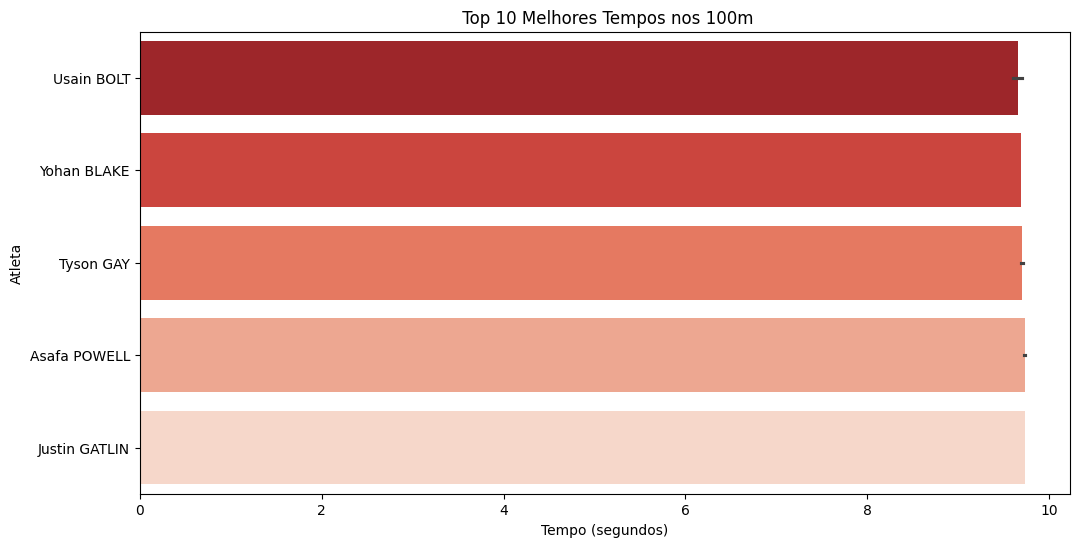

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x="mark_numeric", y="competitor", hue="competitor", data=top_100m, palette="Reds_r", legend=False)
plt.title(" Top 10 Melhores Tempos nos 100m")
plt.xlabel("Tempo (segundos)")
plt.ylabel("Atleta")
plt.show()

Graficos comparativos das provas dos 200 metros

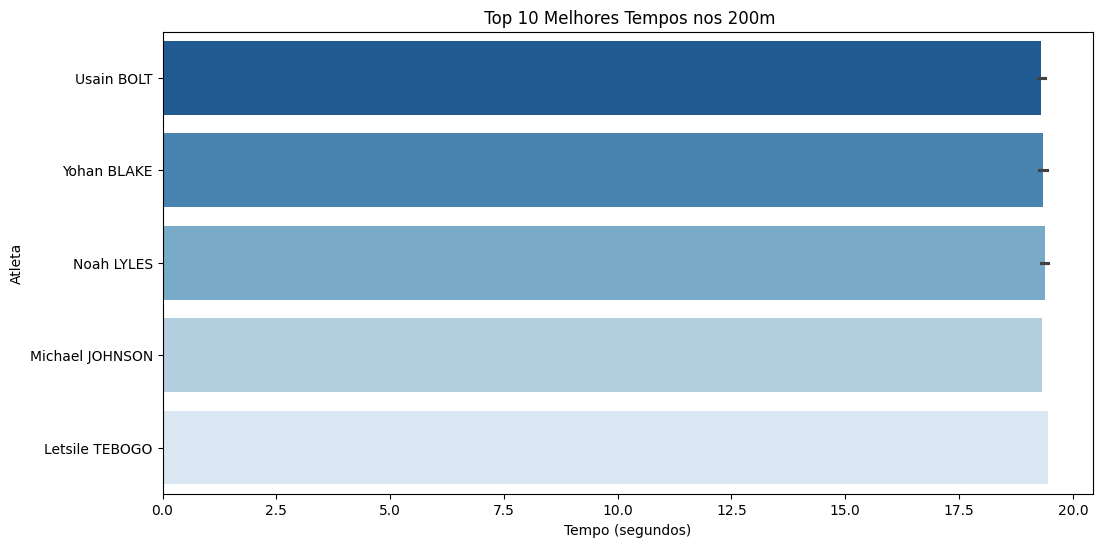

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x="mark_numeric", y="competitor", hue="competitor", data=top_200m, palette="Blues_r", legend=False)
plt.title(" Top 10 Melhores Tempos nos 200m")
plt.xlabel("Tempo (segundos)")
plt.ylabel("Atleta")
plt.show()

Graficos comparativos das provas dos 400 metros

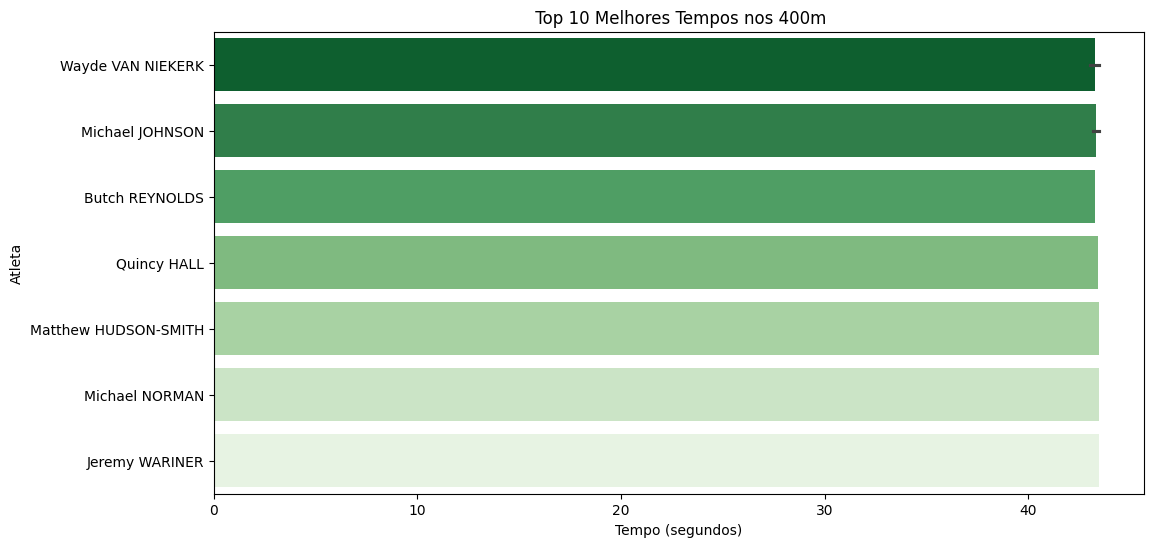

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x="mark_numeric", y="competitor", hue="competitor", data=top_400m, palette="Greens_r", legend=False)
plt.title(" Top 10 Melhores Tempos nos 400m")
plt.xlabel("Tempo (segundos)")
plt.ylabel("Atleta")
plt.show()

Graficos comparativos da maratona

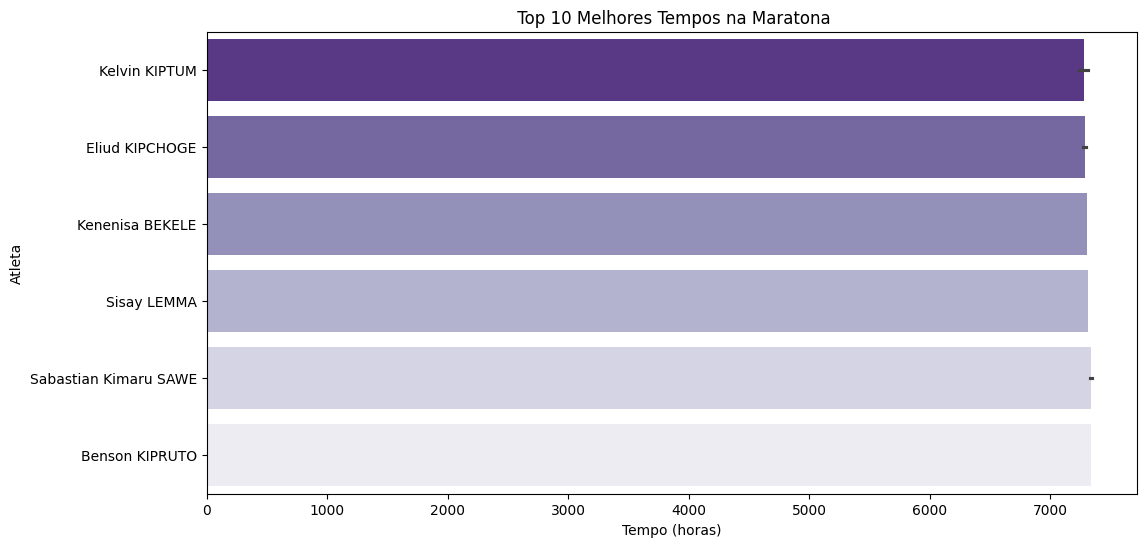

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x="mark_numeric", y="competitor", hue="competitor", data=top_marathon, palette="Purples_r", legend=False)
plt.title(" Top 10 Melhores Tempos na Maratona")
plt.xlabel("Tempo (horas)")
plt.ylabel("Atleta")
plt.show()

### **📊 Conclusões da Análise dos Melhores Desempenhos no Atletismo**

Após analisar os **melhores tempos** nas provas de **100m, 200m, 400m e Maratona**, podemos identificar padrões importantes sobre **os atletas, a evolução dos tempos e o domínio por país**.

---

### **1️⃣ Domínio de Usain Bolt nas provas curtas (100m e 200m)**
O jamaicano **Usain Bolt** consolidou seu lugar como o maior velocista da história, liderando tanto o **100m** (9.58s) quanto o **200m** (19.19s). Outros destaques incluem:
✅ **Yohan Blake** e **Tyson Gay**, que conseguiram tempos abaixo de **9.70s** nos 100m.  
✅ **Michael Johnson** e **Noah Lyles**, que aparecem entre os melhores tempos nos 200m.  

🔹 **Conclusão:** A **Jamaica** domina as provas de velocidade, com Bolt e Blake garantindo o topo dos rankings.

---

### **2️⃣ Evolução nos 400m – Velocidade e resistência**
✅ **Wayde Van Niekerk** detém o recorde mundial com **43.03s** (Rio 2016), seguido por **Michael Johnson** e **Butch Reynolds**.  
✅ Os EUA são a força dominante na prova, com múltiplos atletas na lista de melhores desempenhos.  

🔹 **Conclusão:** A combinação de **força e estratégia de corrida** é essencial para dominar os 400m.

---

### **3️⃣ O domínio do Quênia e Etiópia na Maratona**
✅ **Kelvin Kiptum** se tornou o atleta mais rápido da história da Maratona, com **2:00:35** em Chicago (2023).  
✅ **Eliud Kipchoge**, um dos maiores maratonistas, segue entre os melhores com tempos abaixo de **2:01:30**.  
✅ **Kenenisa Bekele e Sabastian Kimaru Sawe** reforçam o impacto da **Etiópia e Quênia** na resistência.  

🔹 **Conclusão:** O **Quênia** lidera a Maratona com uma estratégia de ritmo constante e resistência extrema.

---

### **🚀 Insights Finais**
📌 **Jamaica e EUA** lideram nas provas curtas, com Usain Bolt, Yohan Blake e Noah Lyles.  
📌 **EUA dominam os 400m**, enquanto o **Quênia** e a **Etiópia** são imbatíveis nas provas de resistência.  
📌 A evolução dos tempos mostra que, apesar da melhoria constante, **recordes como os de Bolt e Kipchoge são difíceis de superar**.  
